# Data Synthesis

Let's synthesize a dataset from MINST since digits are usually not standalone in the real world.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

2024-04-23 08:21:51.802252: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 08:21:51.802748: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 08:21:51.807147: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 08:21:51.894030: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 08:21:52.547015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
[x for x in tfds.list_builders() if 'nist' in x]

2024-04-23 08:21:53.639883: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['binarized_mnist',
 'emnist',
 'fashion_mnist',
 'kmnist',
 'mnist',
 'mnist_corrupted',
 'moving_mnist',
 'huggingface:fashion_mnist',
 'huggingface:mnist']

In [8]:
ds, info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)

In [10]:
len(ds)

60000

In [7]:
for example in ds.take(1):
    print(example['image'])
    print(example['label'])
    

tf.Tensor(
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  

2024-04-22 22:32:48.479652: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-22 22:32:48.482254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-22 22:32:48.607849: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-22 22:32:48.943898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


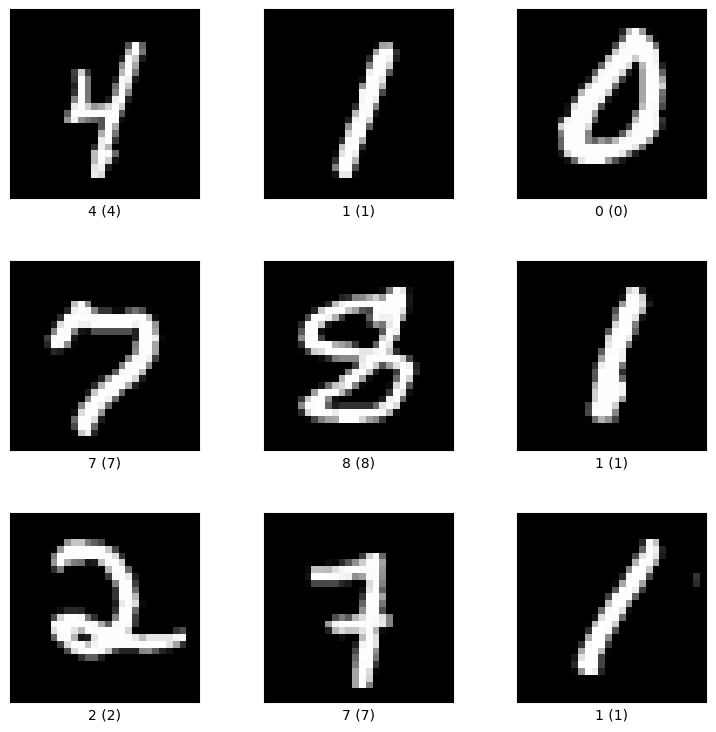

In [8]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

In [9]:
df = tfds.as_dataframe(ds, ds_info=info)

2024-04-22 22:32:59.252244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Axes: xlabel='label'>

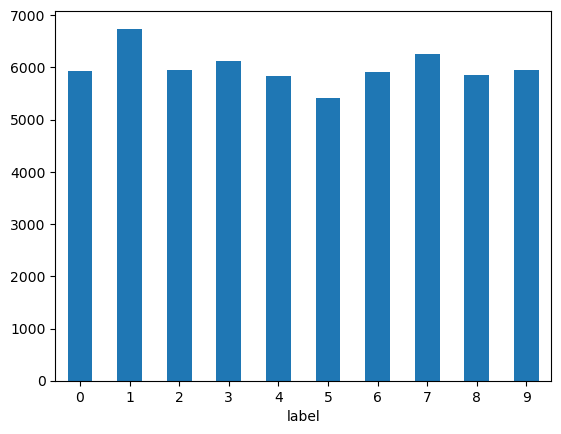

In [10]:
df['label'].value_counts().sort_index().plot.bar(rot=0)

In [11]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
NUM_EXAMPLES = 5000
NUM_CHARS = 4

char_sequences = [str(random.randint(int('1' + str('0' * (NUM_CHARS - 1))), int('9' * NUM_CHARS))) for _ in range(NUM_EXAMPLES)]
char_sequences[:10]

['1542',
 '1895',
 '2648',
 '1158',
 '9628',
 '3512',
 '6409',
 '2030',
 '5641',
 '6142']

In [13]:
sequence_images = np.zeros((NUM_EXAMPLES, 28, 28 * NUM_CHARS, 1), dtype=np.uint8)

In [15]:
for i, seq in enumerate(char_sequences):
    for j, char in enumerate(seq):
        sample = df[df['label'] == int(char)].sample(n=1).iloc[0]
        sequence_images[i, :, j * 28:(j + 1) * 28] = sample['image']

In [30]:
print(f'size of sequence_images: {sequence_images.nbytes / 1024 / 1024:.2f} MB')

size of sequence_images: 14.95 MB


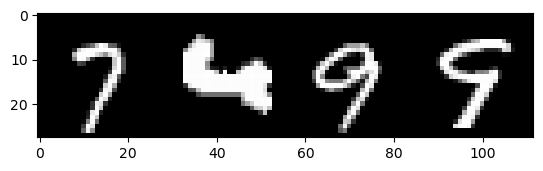

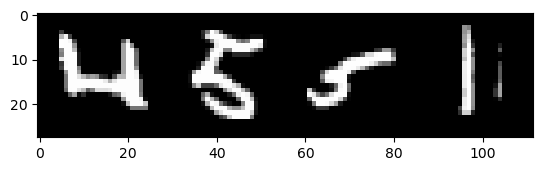

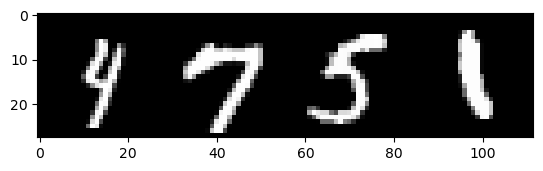

In [193]:
# show a sample of 3 generated sequences
for i in range(3):
    plt.imshow(sequence_images[random.randint(0, NUM_EXAMPLES)], cmap='gray')
    plt.show()

### Save the data

In [206]:
import os

os.makedirs('generated/mnist-seq', exist_ok=True)

In [ ]:
# from PIL import Image

# save generated sequences
# for i, seq in enumerate(char_sequences):
#     img = Image.fromarray(sequence_images[i].reshape(28, 28 * NUM_CHARS))
#     img.save(f'generated/mnist-seq/{i+1:0{int(len(str(NUM_EXAMPLES)))}}_{seq}.png')

In [202]:
f'{5:0{int(len(str(NUM_EXAMPLES)))}}'

'0005'

In [31]:
import shutil

shutil.make_archive('generated/mnist-seq', 'zip', 'generated/mnist-seq')

'/home/hgoz/learn/data-synthesis/generated/mnist-seq.zip'